In [71]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline

In [30]:
# Load the dataset
df = pd.read_csv('personality_dataset.csv')  # Replace with your file path

df = df.copy()



In [41]:
# Handle missing values by dropping rows with any missing values
df_clean = df.dropna()

In [43]:
df_clean = df_clean.copy()  # Make sure it’s a true copy

df_clean.loc[:, 'Drained_after_socializing'] = df_clean['Drained_after_socializing'].map({'No': 0, 'Yes': 1})
df_clean.loc[:, 'Personality'] = df_clean['Personality'].map({'Introvert': 0, 'Extrovert': 1})
df_clean.loc[:, 'Stage_fear'] = df_clean['Stage_fear'].map({'No': 0, 'Yes': 1})




In [44]:
# Check for missing values
print("\nMissing Values:")
print(df_clean.isnull().sum())



Missing Values:
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64


In [45]:
df_clean.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,1
1,9.0,1,0.0,0.0,1,0.0,3.0,0
2,9.0,1,1.0,2.0,1,5.0,2.0,0
3,0.0,0,6.0,7.0,0,14.0,8.0,1
4,3.0,0,9.0,4.0,0,8.0,5.0,1


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


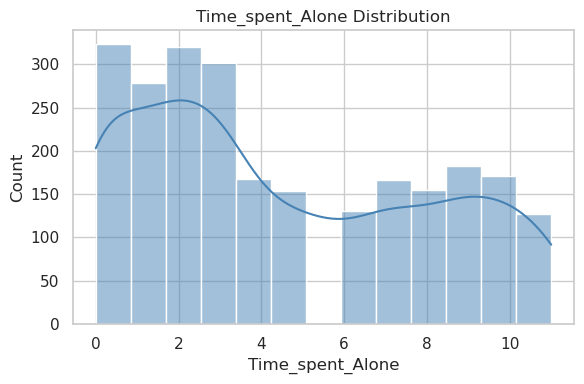

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


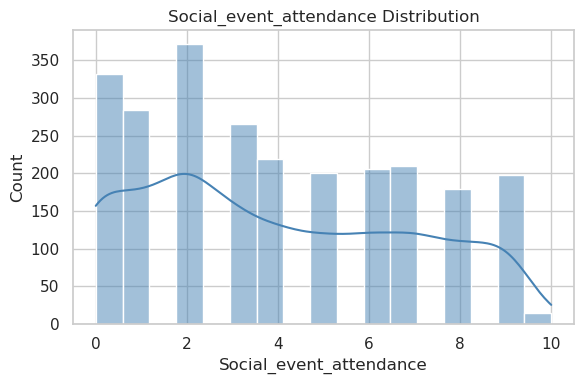

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


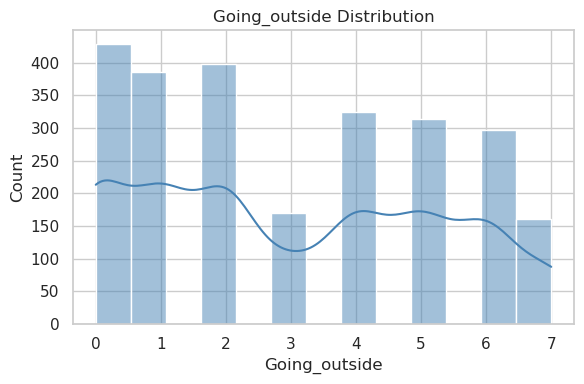

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


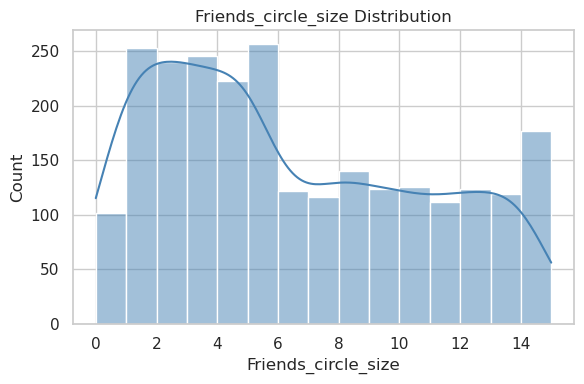

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


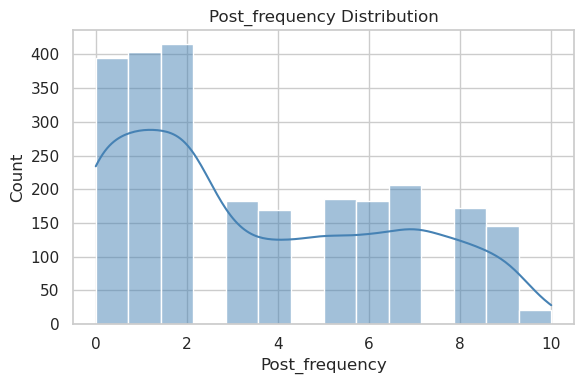

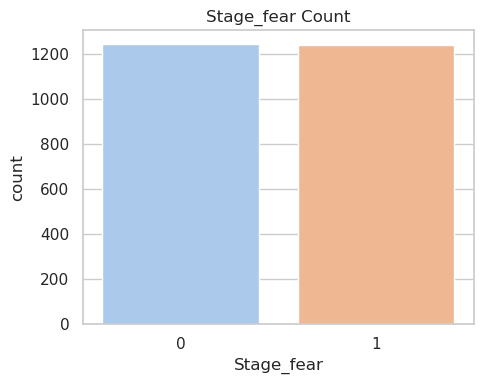

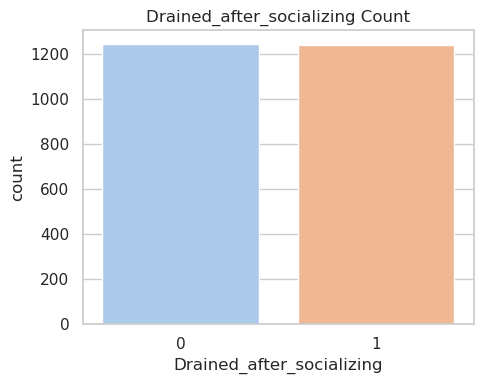

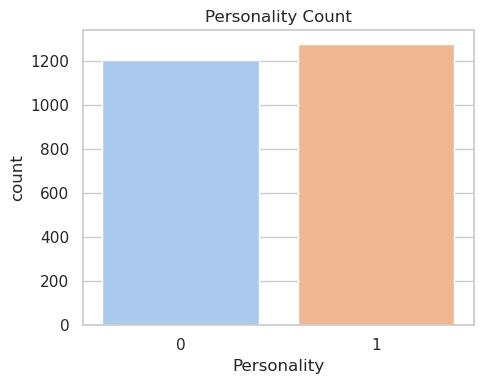

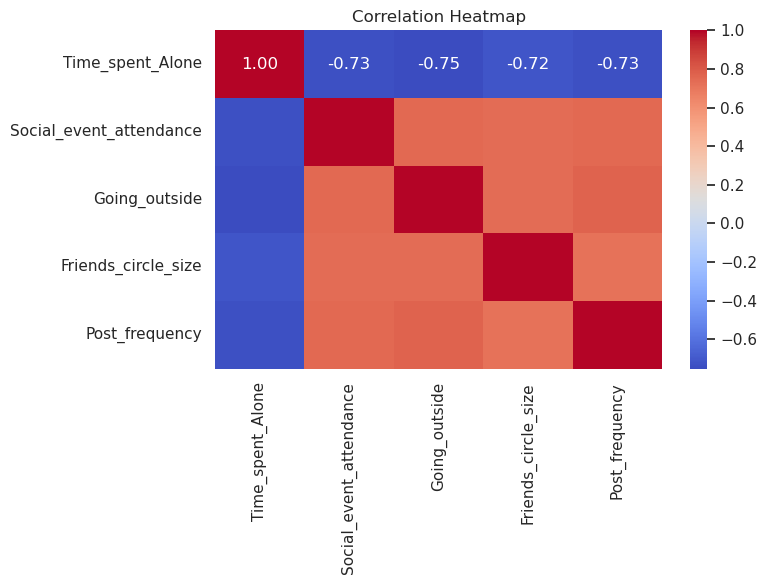

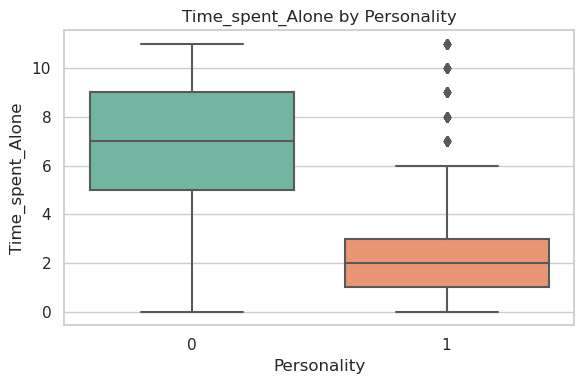

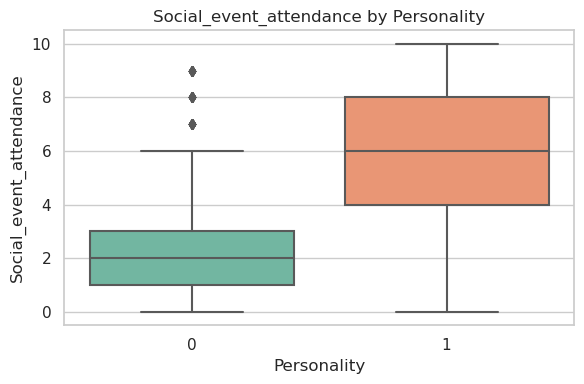

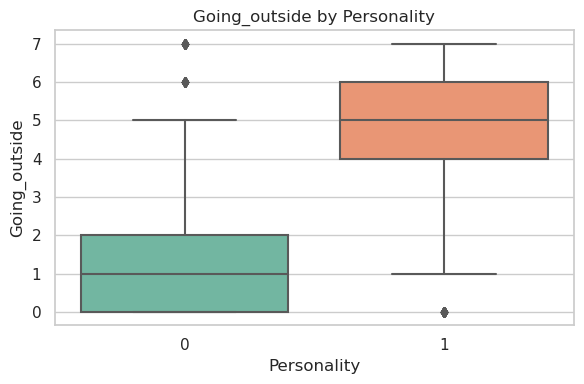

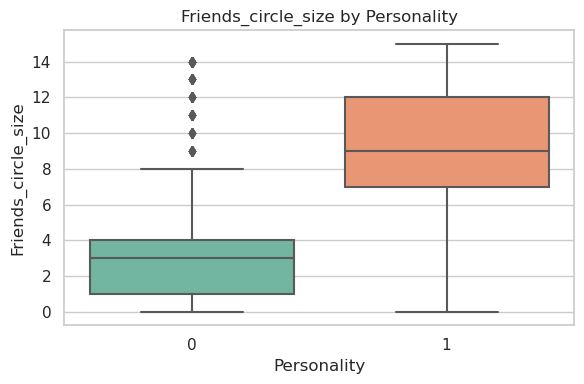

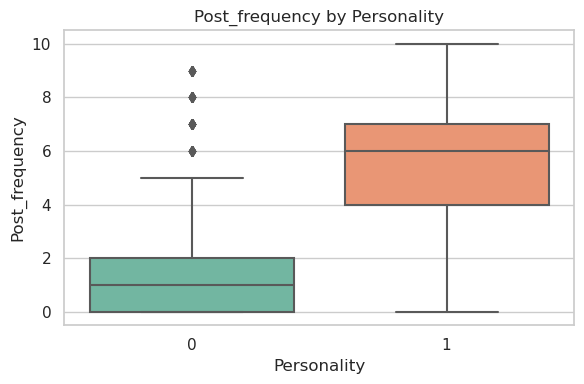

In [49]:
#Assignment: Exploratory Data Analysis,

# Set style for plots
sns.set(style="whitegrid")

# Plot distribution of numerical features
numerical_cols = [
    'Time_spent_Alone', 'Social_event_attendance',
    'Going_outside', 'Friends_circle_size', 'Post_frequency'
]

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_clean[col], kde=True, color='steelblue')
    plt.title(f"{col} Distribution")
    plt.tight_layout()
    plt.show()


# Plot count plots for categorical features
categorical_cols = ['Stage_fear', 'Drained_after_socializing', 'Personality']
for col in categorical_cols:
    plt.figure(figsize=(5, 4))
    sns.countplot(data=df_clean, x=col, palette="pastel")
    plt.title(f"{col} Count")
    plt.tight_layout()
    plt.show()


# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_clean.select_dtypes(include='number').corr()
, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


# Grouped boxplots by Personality
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_clean, x="Personality", y=col, palette="Set2")
    plt.title(f"{col} by Personality")
    plt.tight_layout()
    plt.show()



📌 **Summary & Insights**



**1. Personality Distribution**
The dataset is relatively balanced between Introverts and Extroverts.

**2. Behavioral Traits**


**Introverts:**

Spend more time alone

Attend fewer social events

Have smaller friend circles

Post less frequently on social media



**Extroverts:**

More active socially

Have larger social circles

Tend to go outside more often

**3. Correlations**
There’s a positive correlation between:

Social Event Attendance & Friends Circle Size

Going Outside & Post Frequency

Time spent alone is negatively correlated with social activity.



In [55]:
# Select some features for clustering
X = df_clean[['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance', 'Going_outside', 'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency', 'Personality']]

In [56]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


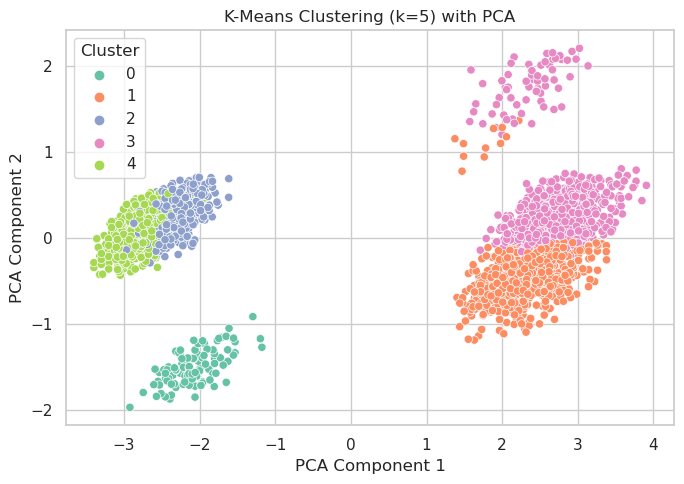

In [66]:

from sklearn.decomposition import PCA


# Apply PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add clusters back to DataFrame
df_clusters = pd.DataFrame(X_pca, columns=["PCA1", "PCA2"])
df_clusters['Cluster'] = clusters

# Plot clusters
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_clusters, x="PCA1", y="PCA2", hue="Cluster", palette="Set2")
plt.title("K-Means Clustering (k=5) with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()



In [68]:
df_clean['Cluster'] = clusters
print(df_clean.groupby("Cluster").mean())


         Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
Cluster                                                                        
0                8.449541        1.0                 1.247706       0.972477   
1                1.513428        0.0                 6.192733       4.932070   
2                5.491166        1.0                 1.439929       1.019435   
3                1.542763        0.0                 6.679276       5.077303   
4                9.406417        1.0                 1.470588       1.021390   

        Drained_after_socializing  Friends_circle_size  Post_frequency  \
Cluster                                                                  
0                             1.0             2.211009        1.000000   
1                             0.0             7.379147        6.129542   
2                             1.0             2.680212        1.083039   
3                             0.0            12.398026        5.97861

**🧠 Interpretation by Cluster**




**Cluster 0 – Classic Extroverts with High Solitude**
- High Time Spent Alone: 8.4 (very high)
- High Stage Fear & Drained After Socializing: 1.0 each
- Low Social Event Attendance, Going Outside, and Small Friend Circles
- Personality: 1.0 ⇒ Encoded as Extrovert, but behaviorally introverted
💬 This group might identify as extroverts but have strong introverted tendencies. Possibly burnout-prone social types who seek quiet more than company.


**Cluster 1 – Social Butterflies**
- Very Low Alone Time, High Social Activity: social event attendance ≈ 6.19, going out ≈ 4.93
- Low Stage Fear and Not Drained, Large Friend Circles
- High Post Frequency and Personality ≈ 0.98 ⇒ Strong Extroverts
🦋 These are your outgoing, energized, and socially confident individuals. Likely enjoy crowds, interaction, and staying connected.


**Cluster 2 – Balanced Introverts**
- Moderate Alone Time, Low Social Interaction
- High Stage Fear, Drained After Socializing
- Small Friend Circles, Low Post Frequency
- Personality = 0 ⇒ Encoded as Introvert
🛋️ This group aligns closely with traditional introverts — they socialize selectively and are likely reflective, reserved, and recharge in solitude.


**Cluster 3 – Sociable Ambiverts**
- Similar to Cluster 1, but slightly less extroverted (Personality ≈ 0.89)
- Highest Social Scores, Lowest Alone Time
- Large friend circles and high post frequency
😎 These could be adaptive or situational extroverts — socially engaged but not as strongly self-identified extroverts as Cluster 1.


**Cluster 4 – Introverts with Consistent Habits**
- Very High Alone Time
- Low Social Event Attendance, High Stage Fear
- Small Friend Circles, Low Online Activity
- Personality = 0 ⇒ Introvert
🌙 Possibly the most consistent introverted cluster, leaning into solitary routines and low-stimulation environments.


**🔍 Overall Insights**
- PCA would beautifully separate these clusters given how distinct some of the behavioral traits are.
- Clusters 1 and 3 form a spectrum of extroverts, whereas 2 and 4 reflect different shades of introversion.
- Cluster 0 is fascinating — behaviorally quiet but personality-wise extroverted, hinting at disconnects between self-perception and behavior.


In [69]:
print(df_clean.groupby("Cluster")["Personality"].value_counts(normalize=True))


Cluster  Personality
0        1              1.000000
1        1              0.982622
         0              0.017378
2        0              1.000000
3        1              0.893092
         0              0.106908
4        0              1.000000
Name: proportion, dtype: float64


**🔍 Cluster Breakdown by Personality**


**Cluster 0**
- 100% Extroverts (1.0)
This group is entirely made up of individuals who self-identify as extroverts. They likely thrive in social settings and prefer external stimulation.


**Cluster 1**
- 98.3% Extroverts
- 1.7% Introverts
Nearly a full extrovert cluster, but with a tiny mix of introverted individuals — maybe socially adaptable introverts who behave like extroverts in context.

**Cluster 2**
- 100% Introverts
A fully introverted cluster — likely composed of individuals who prefer solitude, have smaller social circles, and recharge in quiet settings.

**Cluster 3**
- 89.3% Extroverts
- 10.7% Introverts
A majority-extrovert group with a notable introverted minority. Could represent more balanced or ambiverted individuals.

**Cluster 4**
- 100% Introverts
Just like Cluster 2, this is a dedicated introvert group — maybe differing from Cluster 2 in behavioral traits like event attendance or online activity.


**🧠 Interpretation Summary**
- Clusters 0 and 1 are almost exclusively extroverted.
- Clusters 2 and 4 are purely introverted.
- Cluster 3 is mixed, hinting at ambiversion — people who flex between introvert and extrovert tendencies.



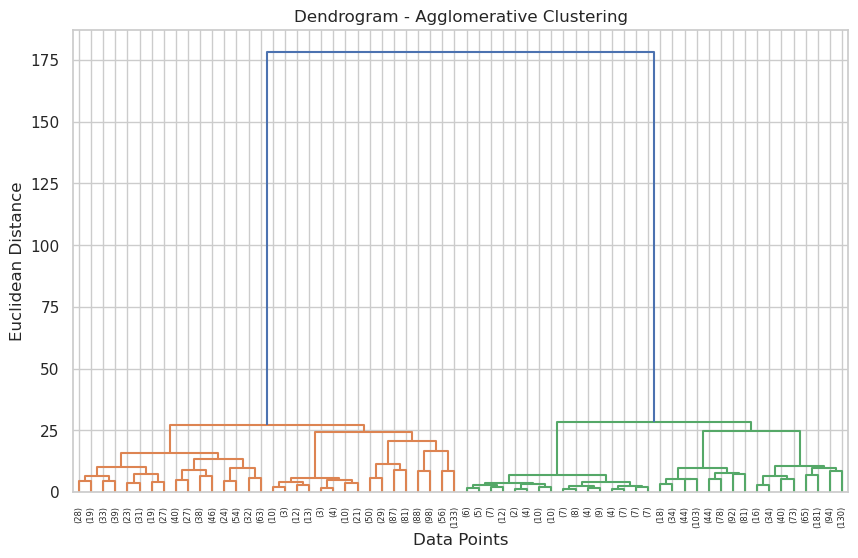

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


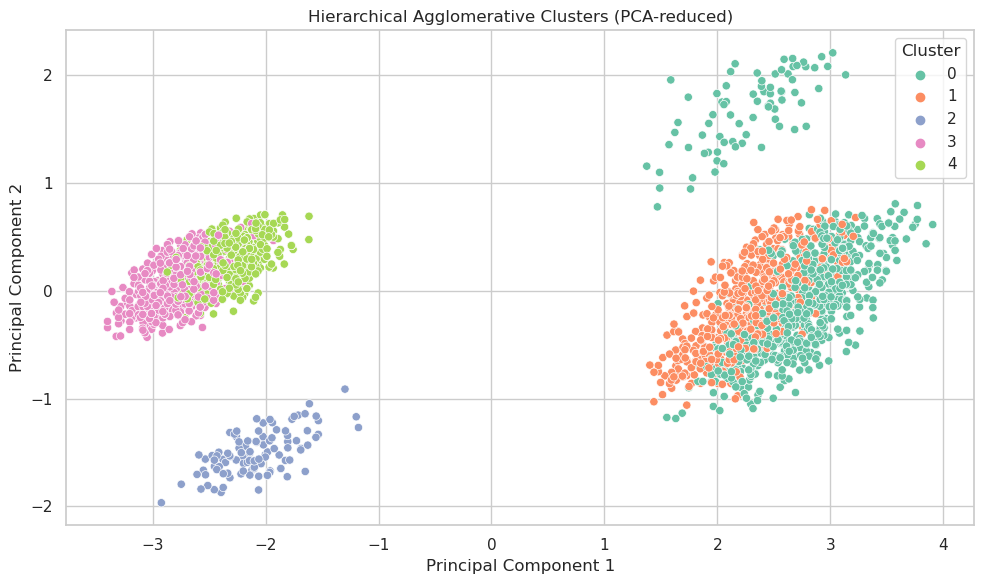

In [72]:

# Hierarchical Clustering

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create linkage matrix
linked = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Dendrogram - Agglomerative Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

# Fit Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
labels = agglo.fit_predict(X_scaled)

# Add clusters to DataFrame
df_clustered = X.copy()
df_clustered['Cluster'] = labels



# Step 1: Fit Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=5)
labels = agg.fit_predict(X_scaled)  # X_scaled: your normalized feature matrix

# Step 2: Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette="Set2")
plt.title("Hierarchical Agglomerative Clusters (PCA-reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()



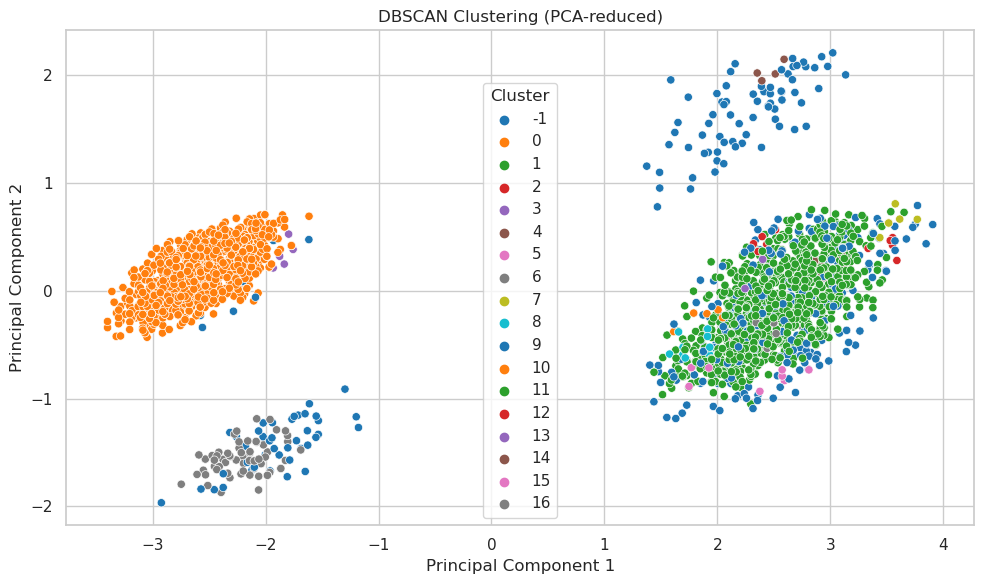

In [74]:


# Step 1: Standardize your data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Replace X with your features

# Step 2: Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Step 3: Visualize (using PCA for 2D projection)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='tab10', legend='full')
plt.title("DBSCAN Clustering (PCA-reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

In [75]:
# Evaluate Clustering Performance
print("\nK-Means Silhouette Score:", silhouette_score(X_scaled, kmeans.labels_))
print("Agglomerative Silhouette Score:", silhouette_score(X_scaled, agglo.labels_))
print("DBSCAN Silhouette Score:", silhouette_score(X_scaled, dbscan.labels_))

print("\nK-Means Calinski-Harabasz Index:", calinski_harabasz_score(X_scaled, kmeans.labels_))
print("Agglomerative Calinski-Harabasz Index:", calinski_harabasz_score(X_scaled, agglo.labels_))
print("DBSCAN Calinski-Harabasz Index:", calinski_harabasz_score(X_scaled, dbscan.labels_))

print("\nK-Means Davies-Bouldin Index:", davies_bouldin_score(X_scaled, kmeans.labels_))
print("Agglomerative Davies-Bouldin Index:", davies_bouldin_score(X_scaled, agglo.labels_))
print("DBSCAN Davies-Bouldin Index:", davies_bouldin_score(X_scaled, dbscan.labels_))


K-Means Silhouette Score: 0.243805678822321
Agglomerative Silhouette Score: 0.2089084081424676
DBSCAN Silhouette Score: -0.10790560702794622

K-Means Calinski-Harabasz Index: 3880.5850175672795
Agglomerative Calinski-Harabasz Index: 3691.8711687324703
DBSCAN Calinski-Harabasz Index: 528.950872698463

K-Means Davies-Bouldin Index: 1.5086032946957917
Agglomerative Davies-Bouldin Index: 1.639326096560191
DBSCAN Davies-Bouldin Index: 1.8022370993229393



**📏 1. Silhouette Score (range: -1 to 1; higher = better)**

- Measures how similar an object is to its own cluster vs others.
- K-Means (0.244) > Agglomerative (0.209) >> DBSCAN (-0.108)
✅ K-Means forms better-separated clusters.
❌ DBSCAN has overlapping, poorly defined clusters — negative score means samples may be closer to other clusters than their own.


**🚀 2. Calinski-Harabasz Index (higher = better) **

- Ratio of between-cluster dispersion to within-cluster cohesion.
- K-Means (3880.6) > Agglomerative (3691.9) >> DBSCAN (528.9)
✅ K-Means again wins here — tight clusters with good separation.
⚠️ DBSCAN likely identified too much noise or scattered points.


**🔄 3. Davies-Bouldin Index (lower = better)**
    
- Measures average similarity between each cluster and its most similar one (lower = more distinct clusters).
- K-Means (1.51) < Agglomerative (1.64) < DBSCAN (1.80)
✅ K-Means edges out the others in minimizing cluster overlap.


**🧠 Summary: Who Wins? **


| **Metric**           | **Best Performer** | 

| Silhouette Score | K-Means | 

| Calinski-Harabasz Index | K-Means | 

| Davies-Bouldin Index | K-Means | 


K-Means comes out on top across all metrics in this case — forming clearer, more compact, and well-separated clusters. Agglomerative does a decent job but a bit less precise, while DBSCAN struggles here .
